# Dissatisfaction Levels of Former School Employees - Part 2

In this project, I will be analyzing the combined_resignations dataset that I created in Part 1 of this project. I will compare most of the columns in the dataset, including Age, Employment Status, Gender, Institute, Position, and Institute Tenure, to the Dissatisfaction column in order to determine if these six factors affect dissatisfaction levels amongst employees.

Through my analysis, I hypothesize I will find the following conclusions:
- As a person ages, they will become less likely to resign due to dissatisfaction.
    - Older people are more likley to have served a long tenure and thus less likely to resign due to being dissatisfied.
    - Older people are more likely to wait until they reach retirement.
- I hypothesize that part-time workers are less likely to leave due to dissatisfaction than full-time workers. Similarly, temporary workers are less likely to leave than are permenant workers are.
    - Part-time workers work fewer hours and thus are less stressed about their jobs as full-time workers are.
    - Temporary workers are more likely to wait until their employment ends.
- Males are more likely to leave due to dissatisfaction than women because statistically speaking men are less agreeable than women and thus less likely to put up with a job they despise.
- The longer the tenure, the less likely the employee is to leave due to dissatisfaction.
    - If they were dissatisfied, they likely wouldn't have worked for the district for such a long time.
    - Longer tenure implies that they are older and thus more likely to wait until retirement to leave.

First, I will import the appropriate modules and read in the combined_resignations dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

combined_resignations = pd.read_csv("combined_resignations.csv", encoding="cp1252")

## 1. Functions to Assist in Analyzing and Visualizing the Data

I will create a series of functions that will assist me in my analysis:
- percent_dissatisfied = will show the percentage of dissatisfied resignees for all possible values within a given column.
- autolabel = will create a text label for each bar within a bar chart displaying the percentage of resignees who are dissatisfied in the value that bar represents. 
- dissatisfied_dictionary = creates a dictionary showing the percentage of dissatisfied resignees for all possible values within a given column.
- dissatisfied_chart = creates a bar chart indicating the percentage of dissatisfied resignees for all possible values within a given column.

### a) Percent Dissatisfied

The percent_dissatisfied function will do the following:
- Take in a dataset and a column name (the dependent variable)
- Create a list of all possible values for that given dependent variable
- Find the percentage of dissatisfied resignees who left due to dissatisfaction for all possible values
    1. Find the total number of resignees for each given value
    2. Find the total number of resignees for each given value who were dissatisfied
    3. Find the percentage of dissatisfied resignees using 1) and 2)
- Sort all possible values from highest dissatisfication percentage to lowest dissatisfaction percentage
- Return a pandas dataframe displaying this percentage, as well as the following:
    1. Number of dissatisfied resignees who left due to dissatisfaction for each possible value
    2. Total number of instances of each possible value

In [2]:
def percent_dissatisfied(data, depend_var):
    percentages = []
    percentages_sorted = []
    
    unique_depend = data[depend_var].unique() # All possible values for a given column
    
    # Finds the percentage of all possible values within a column that are dissatisfied
    for value in unique_depend:
        if type(value) == str and value != "None": # Ensures the value is not nan or None
            total = len(data.loc[data[depend_var] == value])
            sub = len(data.loc[data["Dissatisfaction"] == True][data[depend_var] == value])
            percent = round((sub * 100) / total, 2)
            percentages.append([percent, value, sub, total])
    
    # Sorts from highest percentage dissatisfied to lowest percentage dissatisfied
    percentages = sorted(percentages, reverse = True)
        
    for per in percentages:
        if per[0] > 0:
            percentages_sorted.append([per[1], per[0], per[2], per[3]])
    
    # Creates another row in the dataset indicating the total (will be the sum of all the other rows)
    num_total = len(data.loc[data[depend_var].notnull()])
    num_dis = len(data.loc[data["Dissatisfaction"] == True][data[depend_var].notnull()])
    per_dis = round((num_dis * 100) / num_total, 2)
    percentages_sorted.append(["Total", per_dis, num_dis, num_total])
        
    return pd.DataFrame.from_records(percentages_sorted, columns=[str(depend_var), "Dissatisfaction", "Number Dissatisfied", "Total"])


### b) Auto Label

This function is fairly self-explanatory. For every bar in a given bar chart, it will place the value of that bar slightly above the bar.

In [3]:
def autolabel(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height), # XY position for placing text
                    xytext=(0, 3),  # Places percentage 3 points vertically
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)

### c) Dissatisfied Dictionary

This function will basically do the same thing as the percent_dissatisfied function except it will return an unsorted dictionary rather than a sorted pandas dataframe. This will make it easier to create a nice looking bar chart.

In [4]:
def dissatisfied_dictionary(data, depend_var):
    dissatisfied = {} # Unsorted dictionary will make better bar chart than sorted pandas dataframe
    
    col_vals = list(data[depend_var].unique()) # List of all values within the depend_var col
    col_vals = [x for x in col_vals if str(x) != 'nan'] # Gets rid of nan values
    col_vals = sorted(col_vals)
    
    # Finds the percentage of all possible values within a column that are dissatisfied
    for value in col_vals:
        len_val = len(data.loc[data[depend_var] == value])
        data_indep = data.loc[data["Dissatisfaction"] == True]
        len_val_indep = len(data_indep.loc[data_indep[depend_var] == value])
        decimal = len_val_indep / len_val
        percent = round(decimal * 100, 2)
        dissatisfied[value] = percent
        
    num_total = len(data.loc[data[depend_var].notnull()])
    num_dis = len(data.loc[data["Dissatisfaction"] == True][data[depend_var].notnull()])
    per_dis = round((num_dis * 100) / num_total, 2)
    dissatisfied["Total"] = per_dis
        
    return dissatisfied

### d) Dissatisfied Chart

This function will simply take the dissatisfied_dictionary and create use it to create a bar chart. It will also use the auto_labels function to place the value of each bar above the bars themselves.

In [5]:
def dissatisfied_chart(data, depend_var, width=12):
    
    # Uses dissatisfied_dictionary to get all possible values
    dictionary = dissatisfied_dictionary(data, depend_var)
    
    # Creates a plot for a bar chart (width is adjustable)
    fig, ax = plt.subplots(figsize=(width, 6))
    values = plt.bar(dictionary.keys(), dictionary.values(), color="DarkGreen")
                
    plt.ylabel("Percent Dissatisfied", fontsize=14)
    
    # Leaves room for the auto label created above each bar chart
    maxim = max(dictionary.values())
    plt.ylim(0, maxim*1.1)
    
    # Makes the fontsize larger for both the x and y ticks
    plt.rcParams['xtick.labelsize']=12    
    plt.rcParams['ytick.labelsize']=12
    
    plt.title("Dissatisfaction Levels by {}".format(depend_var), fontsize=18, y=1.01)
    
    plt.tick_params(axis="both", which="both", top=False, bottom=False, labelbottom=True)

    autolabel(values) # Places values over each of the bars
    
    plt.show()

## 2. How Dissatisfaction Levels Vary by Demographic Factors

In this section, I will use the functions created above to visualize the relationship between dissatisfaction levels and demographic factors, including age, employment status, gender, institute, position, and institute tenure.

### a) Dissatisfaction vs. Age

First, I will analyze how the age of the resignee affects disssatisfaction levels. In the introduction, I hypothesized that older employees were less likely to resign due to dissatisfaction.

In [6]:
age_dissatisfied = percent_dissatisfied(combined_resignations, "Age")
age_dissatisfied

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Age,Dissatisfaction,Number Dissatisfied,Total
0,56+,42.31,33,78
1,51-55,42.25,30,71
2,26-30,41.79,28,67
3,46-50,38.27,31,81
4,31-35,37.70,23,61
5,41-45,37.63,35,93
6,36-40,34.25,25,73
7,21-25,30.65,19,62
8,18-20,20.00,2,10
9,Total,37.92,226,596


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


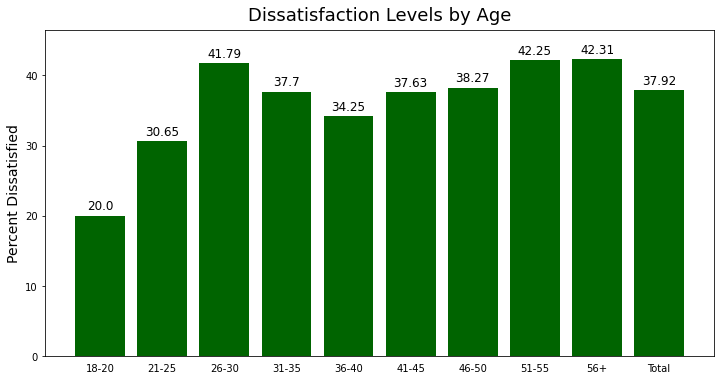

In [7]:
dissatisfied_chart(combined_resignations, "Age")

My original hypothesis was completely incorrect. There is a postive correlation betwen dissatisfaction levels and age. The least likely resignees to be dissatisfied are in the "18-20" age group and the most likely to be dissatisfied are in the "56+" group. 

An alternative hypothesis is that younger employees are still developing their careers and thus are more likely to leave because they found a better alternative or moved to a new place than older employees are.

### b) Dissatisfaction vs. Employment Status

Next, I will analyze how the employment status affects dissatisfaction levels. Note that I originally hypothesized that part-time employees would be likely to leave due to dissatisfaction than full-time employees would and that temporary employees would be less likely to leave due to dissatisfaction than permenant employees.

In [8]:
employment_dissatisfied = percent_dissatisfied(combined_resignations, "Employment Status")
employment_dissatisfied

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Employment Status,Dissatisfaction,Number Dissatisfied,Total
0,Full-time,46.09,118,256
1,Part-time,42.67,64,150
2,Temp (Part),25.83,31,120
3,Casual,17.65,6,34
4,Temp (Full),16.22,6,37
5,Total,37.69,225,597


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


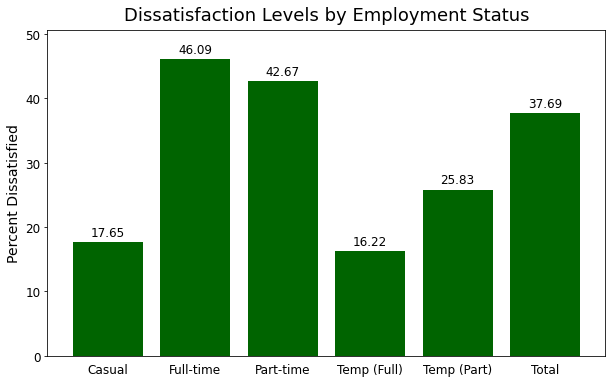

In [9]:
dissatisfied_chart(combined_resignations, "Employment Status", 10)

Interestingly, there is not a significant difference between permenant full-time and part-time employees in terms of dissatisfaction levels. And while temporary employees are much less likely to leave due to dissatisfaction than permenant employees are, part-time temporary employees are more dissatisfied than full-time temporary employees.

An alternative hypothesis is that part-time temporary employees are struggling to make ends meet because they aren't able to get enough hours, which is why they are less satisfied than full-time temporary employees.

### c) Dissatisfaction vs. Gender

Next, I will analyze how gender affects dissatisfaction levels. I originally hypothesized that men would be more likely to leave due to disatisfaction than women.

In [10]:
gender_dissatisfied = percent_dissatisfied(combined_resignations, "Gender")
gender_dissatisfied

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Gender,Dissatisfaction,Number Dissatisfied,Total
0,Male,39.88,67,168
1,Female,37.03,157,424
2,Total,37.84,224,592


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


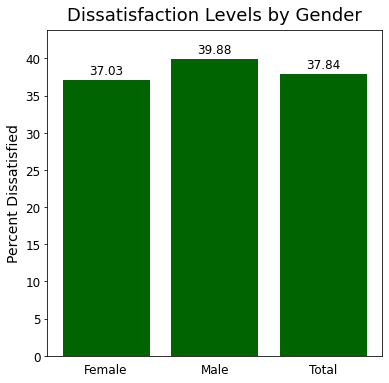

In [11]:
dissatisfied_chart(combined_resignations, "Gender", 6)

Men are slightly more likely to leave due to dissatisfaction than women, but the difference is not significant. What's more noteworthy is that there are almost three times as many women as there are men.

### d) Dissatisfaction vs. Institute

Next, I will analyze how institute affects dissatisfaction levels. Note that I did not create a hypothesis on this factor as I do not know much information about each individual institute.

In [12]:
institute_dissatisfied = percent_dissatisfied(combined_resignations, "Institute")
institute_dissatisfied

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Institute,Dissatisfaction,Number Dissatisfied,Total
0,DETE,47.91,149,311
1,TAFE,26.76,91,340
2,Total,36.87,240,651


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


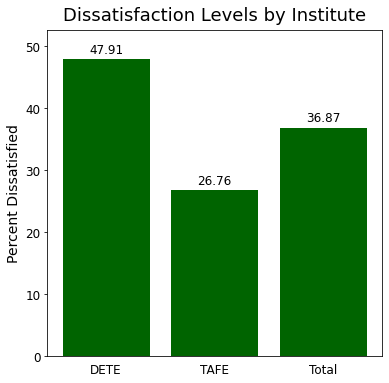

In [13]:
dissatisfied_chart(combined_resignations, "Institute", 6)

Employees at the DETE institute are much more likely to resign due to dissatisfaction than employees at the TAFE institute. Perhaps the TAFE institute is better run and thus employees are less likely to leave due to dissatisfaction. 

### e) Dissatisfaction vs. Position

Next, I will analyze how position affects dissatisfaction levels.

In [14]:
position_dissatisfied = percent_dissatisfied(combined_resignations, "Position")
position_dissatisfied

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Position,Dissatisfaction,Number Dissatisfied,Total
0,Teacher / TA,44.25,127,287
1,Operations,42.31,22,52
2,Administration,29.85,60,201
3,Other,27.27,3,11
4,Officer,25.53,12,47
5,Total,37.46,224,598


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


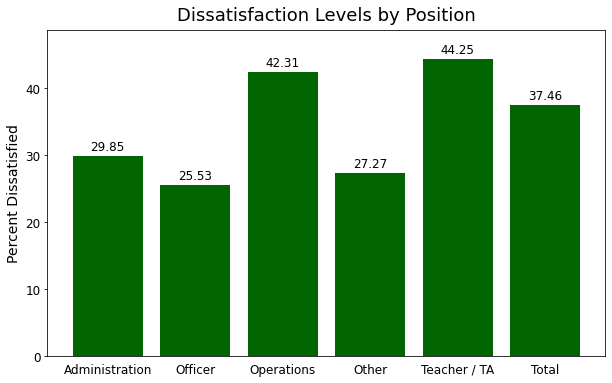

In [15]:
dissatisfied_chart(combined_resignations, "Position", 10)

Teacher, TA, and Operations are the most likely to leave due to dissatisfaction whereas Administration, Officer, and Other are the least likely. I don't know enough about the positions themselves to make a valid conclusion as to why.

### f) Dissatisfaction vs. Institute Tenure

Finally, I will analyze how tenure affects dissatisfaction levels. I originally hypothesized that longer tenure would be associated with a lower likelihood of leaving due to dissatisfaction.

In [16]:
years_dissatisfied = percent_dissatisfied(combined_resignations, "Institute Tenure")
years_dissatisfied

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Institute Tenure,Dissatisfaction,Number Dissatisfied,Total
0,21+,58.49,31,53
1,7-10,51.61,32,62
2,5-6,42.47,31,73
3,11-20,42.17,35,83
4,0-1,32.26,30,93
5,3-4,28.28,28,99
6,1-2,27.00,27,100
7,Total,38.01,214,563


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


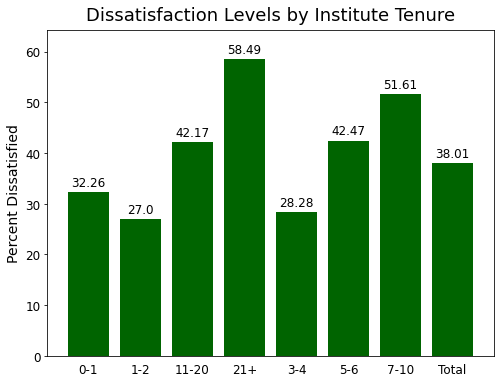

In [17]:
dissatisfied_chart(combined_resignations, "Institute Tenure", 8)

Based on the analysis above, the longer an employee has worked at the firm, the more likely they are to resign due to dissatisfaction. An employee who has worked for the institute for over 20 years is highly likely to resign due to dissatisfaction. In contrast, employees who have worked for the institute for less than 5 years are very unlikely to leave due to dissatisfaction.

An alternative hypothesis is that employees who have worked for a shorter amount of time are more likely to have left due to promotions or a better job offer, whereas employees who have not worked for a long amount of time are not.

## 3. Results

Based on my analysis, I have come to the following conclusions:
- Age is positively correlated with resigning due to dissatisfaction.
- Temporary workers are less likely to resign due to dissatisfaction, and part-time temporary workers are more likely to be dissatisfied than full-time temporary workers.
- Both men and women are equally likely to resign due to dissatisfaction.
- Employees of the TAFE dataset are much less likely to resign due to dissatisfaction than those of the DETE dataset
- Administration, Officer, and Other are less likely to resign due to dissatisfaction than Teacher / TA and Operational are
- Longer tenure is positively correlated with resigning due to dissatisfaction

It is noteworthy to point out one of the major flaws with this study. The TAFE exit survey has much fewer options that indicate dissatisfaction than the DETE exit survey does. Due to the lower number of options, it is possible that fewer dissatisfied employees indicated they were dissatisfied on the TAFE exit survey than they did on the DETE exit survey. This might be one of the reasons as to why the TAFE dataset has much fewer dissatisfied resignees than the DETE exit survey does. Similarly, note that the TAFE dataset has more younger employees and more employees in Administration than the DETE dataset does. This could be part of the reason as to why younger employees and employees in Administration reported lower levels of dissatisfaction.